**Analysis of Air Quality Index of Countries around the world**

AQI is a recognized index which is helped to measure and understand the quality of the air in a given environment. I have heavily used python along with its pandas library for analysis.The data only consist aqi records from 3 years: 2022, 2023, and 2024. This analysis focuses on finding out how many countries have improved their aqi level status, how many have maintained their aqi levels, and how many have deteriorated their aqi levels. Result will also contain the countries which improved their aqi levels the most and the ones which detereorated the aqi levels the most.

In [2]:
#import some libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
image = Image.open('/content/air-pollution-in-urban-area.jpg')

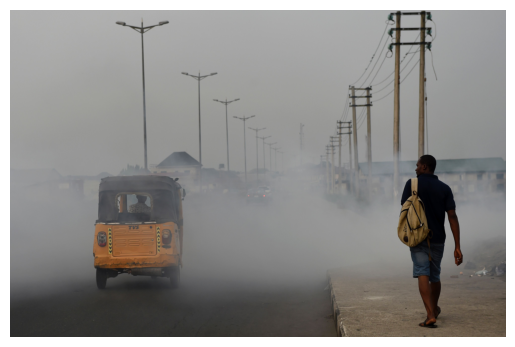

In [6]:
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [7]:
#For data Loading
data = pd.read_csv('/content/data_date.csv')

In [8]:
data.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [9]:
data.tail()

,Date,Country,Status,AQI Value
16045,2024-11-07,United States of America,Unhealthy for Sensitive Groups,126
16046,2024-11-07,Uzbekistan,Moderate,65
16047,2024-11-07,Vatican,Moderate,78
16048,2024-11-07,Venezuela,Good,11
16049,2024-11-07,Vietnam,Moderate,99


In [10]:
print(f"Total number of rows in data = {len(data)}")

Total number of rows in data = 16050


In [11]:
data.duplicated().sum()

300

In [12]:
# There are 300 duplicates in this dataset. We will have to remove those duplicates for correct and accurate analysis
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [13]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date         0
Country      0
Status       0
AQI Value    0
dtype: int64


In [14]:
#Know we see how many different countries we have in our dataset.
data["Date"] = pd.to_datetime(data["Date"])

data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day

data.head()

,Date,Country,Status,AQI Value,Year,Month,Day
0,2022-07-21,Albania,Good,14,2022,7,21
1,2022-07-21,Algeria,Moderate,65,2022,7,21
2,2022-07-21,Andorra,Moderate,55,2022,7,21
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113,2022,7,21
4,2022-07-21,Argentina,Moderate,63,2022,7,21


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15750 entries, 0 to 16049
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15750 non-null  datetime64[ns]
 1   Country    15750 non-null  object        
 2   Status     15750 non-null  object        
 3   AQI Value  15750 non-null  int64         
 4   Year       15750 non-null  int32         
 5   Month      15750 non-null  int32         
 6   Day        15750 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(2)
memory usage: 799.8+ KB


In [16]:
len(data["Country"].unique())

142

We know that we have 142 out of 195 countries in the world in our dataset. Now, let us see what different values does the Status column have.


In [18]:
#Explore unique status types in Air quality
print("\nUnique AQI Status types:\n", data['Status'].unique())


Unique AQI Status types:
 ['Good' 'Moderate' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy' 'Hazardous']


In [19]:
#For distribution of AQI values
aqi_per_status = pd.DataFrame(data.groupby("Status").agg(
min_AQI=('AQI Value', "min"),
max_AQI=('AQI Value', "max")))

aqi_per_status.sort_values(by="min_AQI", ascending=True)

,min_AQI,max_AQI
Status,,
Good,1,50
Moderate,51,100
Unhealthy for Sensitive Groups,101,150
Unhealthy,151,200
Very Unhealthy,202,300
Hazardous,301,963


In [20]:
pivot_table = pd.DataFrame(pd.pivot_table(
data,
index = "Country",
columns = "Year",
values = "AQI Value",
aggfunc = "mean"))

pivot_table

Year,2022,2023,2024
Country,,,
Albania,26.457143,25.681818,26.086957
Algeria,65.000000,51.428571,51.857143
Andorra,32.788732,26.000000,28.608696
Angola,109.408451,109.636364,NaN
Argentina,37.605634,30.590909,42.608696
...,...,...,...
Uzbekistan,67.338235,63.727273,81.000000
Vatican,43.878788,44.272727,44.608696
Venezuela,13.910448,15.545455,18.826087


In [21]:
# Step 3: Convert Date column to datetime format for time-based analysis
data['Date'] = pd.to_datetime(data['Date'])

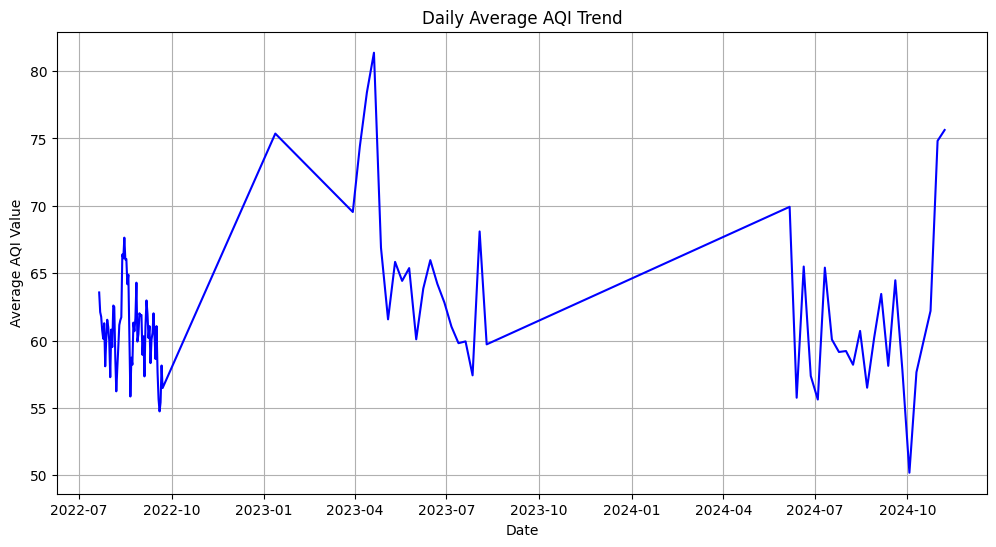

In [22]:
# Visualize the trend of AQI values over time
plt.figure(figsize=(12, 6))
daily_aqi = data.groupby('Date')['AQI Value'].mean()
plt.plot(daily_aqi, color='blue')
plt.title("Daily Average AQI Trend")
plt.xlabel("Date")
plt.ylabel("Average AQI Value")
plt.grid()
plt.show()

Analyzing data specific to Pakistani cities,

In [23]:
pakistan_data = data[data['Country'] == 'Pakistan']

In [24]:
pakistan_data.head()

,Date,Country,Status,AQI Value,Year,Month,Day
100,2022-07-21,Pakistan,Moderate,91,2022,7,21
384,2022-07-22,Pakistan,Moderate,91,2022,7,22
807,2022-07-23,Pakistan,Moderate,91,2022,7,23
1089,2022-07-24,Pakistan,Moderate,91,2022,7,24
1230,2022-07-25,Pakistan,Moderate,91,2022,7,25


In [25]:
print(data.columns)

Index(['Date', 'Country', 'Status', 'AQI Value', 'Year', 'Month', 'Day'], dtype='object')


In [26]:
# Step 3: Check for unique values in Location or Status columns (if present)
# Agar Location ya Status column hain, toh un mein unique values check karte hain
if 'Location' in pakistan_data.columns:
    print("\nUnique Locations in Pakistan:\n", pakistan_data['Location'].unique())
elif 'Status' in pakistan_data.columns:
    print("\nUnique Status types in Pakistan:\n", pakistan_data['Status'].unique())
else:
    print("No Location or Status column found.")


Unique Status types in Pakistan:
 ['Moderate' 'Good' 'Unhealthy for Sensitive Groups']


In [27]:
#I find Lahore City in this Data set
lahore_data = data.apply(lambda row: row.astype(str).str.contains('Lahore', case=False, na=False).any(), axis=1)

In [29]:
lahore_rows = data[lahore_data]

In [30]:
if not lahore_rows.empty:
    print("Lahore is present in the dataset. Here are the rows:\n", lahore_rows)
else:
    print("Lahore is not present in the dataset.")

Lahore is not present in the dataset.


In [31]:
city_column = None
for column in ['City', 'Location', 'Region', 'Area']:
    if column in pakistan_data.columns:
        city_column = column
        unique_cities = pakistan_data[column].unique()
        break

# Display unique cities in the selected column, if found
if city_column:
    print(f"Unique cities in Pakistan from the '{city_column}' column:\n", unique_cities)
else:
    print("No columns found with city information.")

No columns found with city information.


Actully I want find Pakistani Air Polution But In This data set there is no specific Record about Pakistan ,